# SR-Dyna (Detour Task)

In [116]:
import matplotlib.pyplot as plt
import numpy as np
import srdyna
import importlib

In [117]:
importlib.reload(srdyna)

<module 'srdyna' from '/Users/jeremygordon/repos/sr-dyna/srdyna.py'>

Loaded 10x10 world with 102 states
Trial finished in 280 steps
Trial finished in 23 steps
Trial finished in 14 steps
Trial finished in 10 steps
Trial finished in 10 steps
range(236, 240) 400
range(236, 240) 400


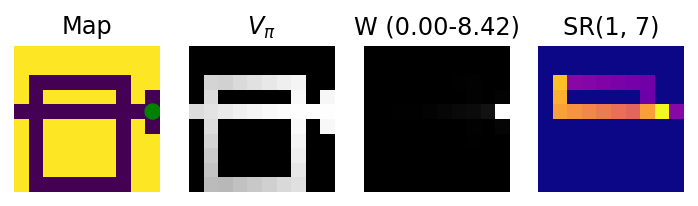

range(236, 240) 400
range(236, 240) 400


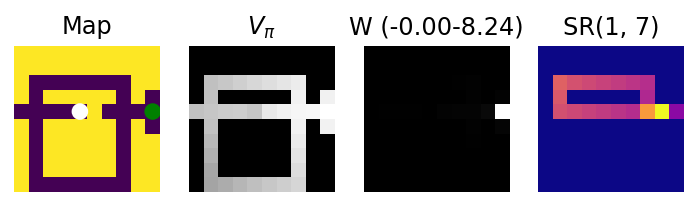

range(236, 240) 400
range(236, 240) 400


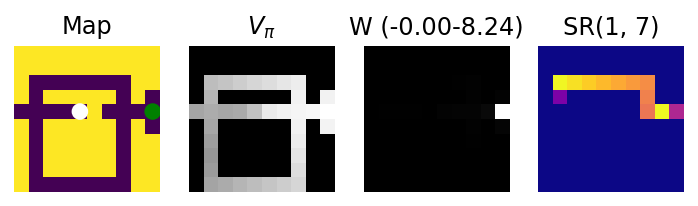

In [118]:
# Detour Task
REPLAY = "sufficient"
EXPLORE_STEPS = 10000
POST_REWARD_TRIALS = 5
WALL_LEARNING_STEPS = 40
REPLAY_STEPS = {
    "insufficient": 10,
    "sufficient": 10000
}[REPLAY]
env = srdyna.SimpleGridWorld(world='worlds/detour_task.txt')
S_LOC = (0, 5)
agent = srdyna.SRDyna(id=0, loc=S_LOC, env=env)

# Explore
for i in range(EXPLORE_STEPS):
    agent.step(random_policy=True)

# Add reward
R_LOC = (9, 5)
env.add_reward(R_LOC, 10)

for i in range(POST_REWARD_TRIALS):
    # Repeated trials from S (until reward reached)
    agent.terminate_episode(reset_state=env.state_at_loc(S_LOC))
    done = False
    steps = 0
    MAX_STEPS = 500
    while not done and steps < MAX_STEPS:
        done = agent.step(verbose=False)
        steps += 1
    print("Trial finished in %d steps" % steps)

# One-step replay samples from random sa's
agent.learn_offline(k=REPLAY_STEPS)
    
agent.make_plots(sr_state=env.state_at_loc((1, 7)))

# Add barrier
B_LOC = (5, 5)
S2_LOC = (4, 5)
env.wall_coords.append(B_LOC)
env.map = env.get_map()
    
for i in range(WALL_LEARNING_STEPS):
    # One-step runs from left of new wall
    reset_state = env.state_at_loc(S2_LOC)
    agent.terminate_episode(reset_state=reset_state)
    agent.step()

agent.make_plots(sr_state=env.state_at_loc((1, 7)))
    
# One-step replay samples from random sa's
agent.learn_offline(k=REPLAY_STEPS)
    
agent.make_plots(sr_state=env.state_at_loc((1, 7)))

range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400
range(236, 240) 400


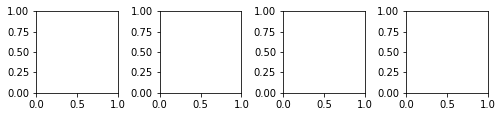

In [120]:
# Generate anim (slow)
agent.record_trials(title="detour", 
                    learning=False,
                    start_locs=[(0, 5), (4, 5), (7, 0), (7, 7)])